# Libraries
---

In [1]:
# Data handling
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load Model
---

In [2]:
# Load model
with open('model.pkl', 'rb') as model:
    model = pickle.load(model)

# Load data
with open('data_test.pkl', 'rb') as data:
    test = pickle.load(data)

In [3]:
# Make sure the date is an index
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2022-06-20 to 2022-06-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales_sum  9 non-null      float64
 1   qty_sum    9 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 216.0 bytes


# Forecasting
---

In [4]:
# Indexing future dates
forecast_days = 10

# Future total quantity for future dates
future_qty_sum = [718, 696, 678, 650, 687, 763, 790, 777, 854, 902]

In [5]:
# Ensure test.index[-1] is a Timestamp and then add Timedelta for weekly forecast
forecast_index = pd.date_range(test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')

# Create DataFrame for future exogenous variables
future_exog_vars = pd.DataFrame(future_qty_sum, columns=['qty_sum'], index=forecast_index)


# Forecast the future total sales
forecast = model.get_forecast(steps=forecast_days, exog=future_exog_vars)
forecast_mean = forecast.predicted_mean

In [6]:
# Forecast result
forecast_mean

2022-06-20    477323.547789
2022-06-21    459245.905098
2022-06-22    449494.707408
2022-06-23    426412.115605
2022-06-24    457922.906305
2022-06-25    502138.538399
2022-06-26    515342.333586
2022-06-27    509213.219272
2022-06-28    557568.073127
2022-06-29    591706.207971
Freq: D, Name: predicted_mean, dtype: float64

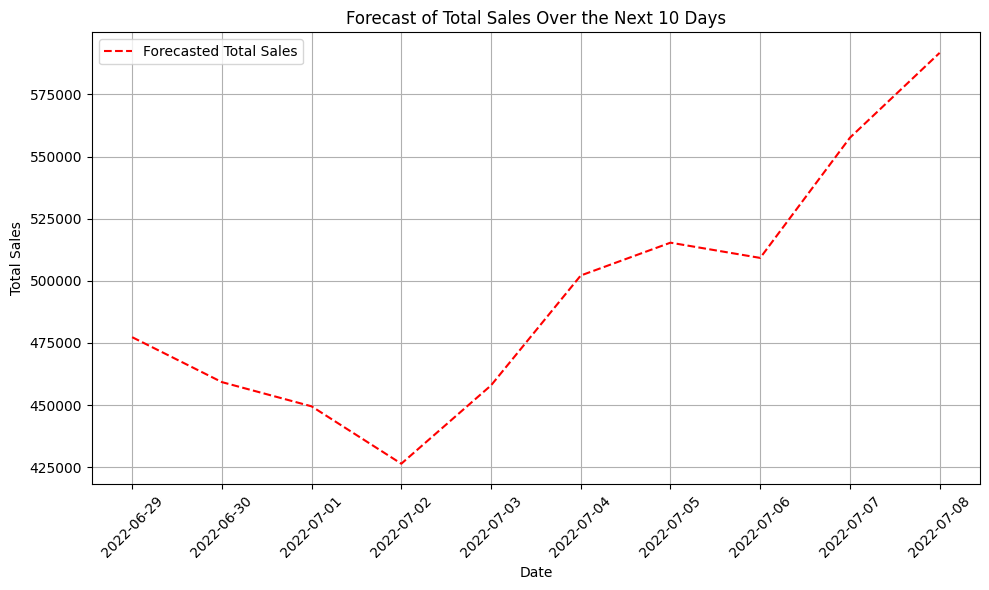

In [7]:
# Visualization Forecast

# Create a plot
plt.figure(figsize=(10, 6))

# Plot forecasted values for the next 4 weeks
plt.plot(forecast_index, forecast_mean, label='Forecasted Total Sales', color='red', linestyle='--')

# Labels and title
plt.title('Forecast of Total Sales Over the Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()